# PCA

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

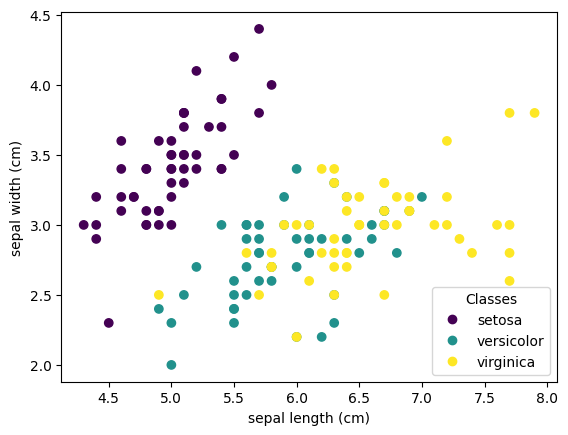

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

pivoted_iris = pd.get_dummies(iris_df, columns=['species'], prefix='', prefix_sep='', dtype=int)

iris_X = np.array(pivoted_iris)[:, :4]
iris_y = np.array(pivoted_iris)[:, 4:]

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

### Zad 1

In [39]:
# odjecie srednich
iris_X = iris_X - iris_X.mean(0)
iris_X = iris_X/(iris_X.std(0))

# macierz cov
covariance = np.cov(iris_X.T)
covariance.shape

#wartosci i wektory wlasne
(eigvals, eigvec) = np.linalg.eig(covariance)
eigmatrix = np.eye(eigvec.shape[0], eigvec.shape[1])*eigvals

#przekształcenie
k = 4
iris_Z = iris_X@eigvec[:, :k]

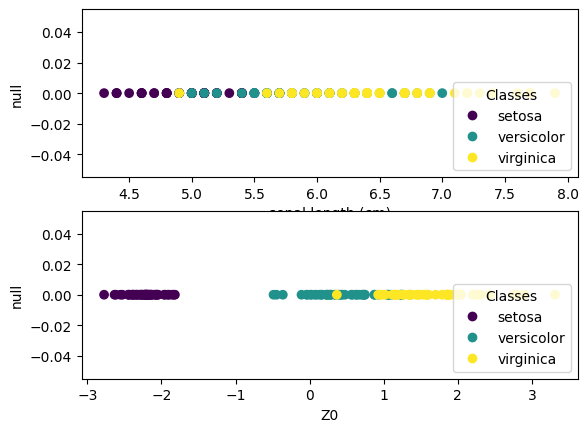

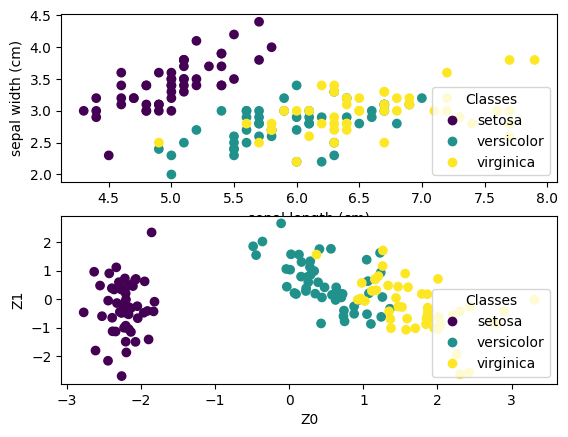

In [38]:
#1 cecha
_, ax = plt.subplots(2)
scatter = ax[0].scatter(iris.data[:, 0], np.zeros(iris.data[:, 0].shape), c=iris.target)
ax[0].set(xlabel=iris.feature_names[0], ylabel="null")
_ = ax[0].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
scatter = ax[1].scatter(iris_Z[:, 0], np.zeros(iris_Z[:, 0].shape), c=iris.target)
ax[1].set(xlabel="Z0", ylabel="null")
_ = ax[1].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()

#2 cechy
_, ax = plt.subplots(2)
scatter = ax[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax[0].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
scatter = ax[1].scatter(iris_Z[:, 0], iris_Z[:, 1], c=iris.target)
ax[1].set(xlabel="Z0", ylabel="Z1")
_ = ax[1].legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()



### Zad 2